In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import os
os_name = os.sys.platform

#Mac Path
if os_name == 'darwin':
    filePath = '/Users/igoeja/Documents/GitHub/DataAnalytics/Data/ourworldindata_Covid_2021-05-07.csv'
else:
    filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\ourworldindata_Covid_2021-05-07.csv'

df = pd.read_csv(filePath)


In [3]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
46,TUR,Asia,Turkey,2021-05-06,68442,460,458.429,328,1,2.857,...,37.3,13.416,8.563,32415.132,NaN,141.171,9.24,3.40,80.98,0.887
47,GBR,Europe,United Kingdom,2021-05-06,1641120,1872,1797.714,29521,42,44.000,...,43.3,19.027,11.580,32605.906,NaN,227.485,6.82,6.63,79.38,0.900
48,USA,North America,United States,2021-05-06,30201,71,55.571,770,0,1.000,...,17.0,3.020,1.745,808.133,77.1,318.949,6.10,NaN,60.68,0.480
49,URY,South America,Uruguay,2021-05-06,257181,2000,847.571,2494,2,1.429,...,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,2.50,80.90,0.940
50,VEN,South America,Venezuela,2021-05-06,11307,39,40.143,148,1,0.714,...,25.4,4.213,2.380,2705.406,22.5,258.037,6.05,1.40,67.11,0.524


In [4]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [5]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [6]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [7]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [8]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

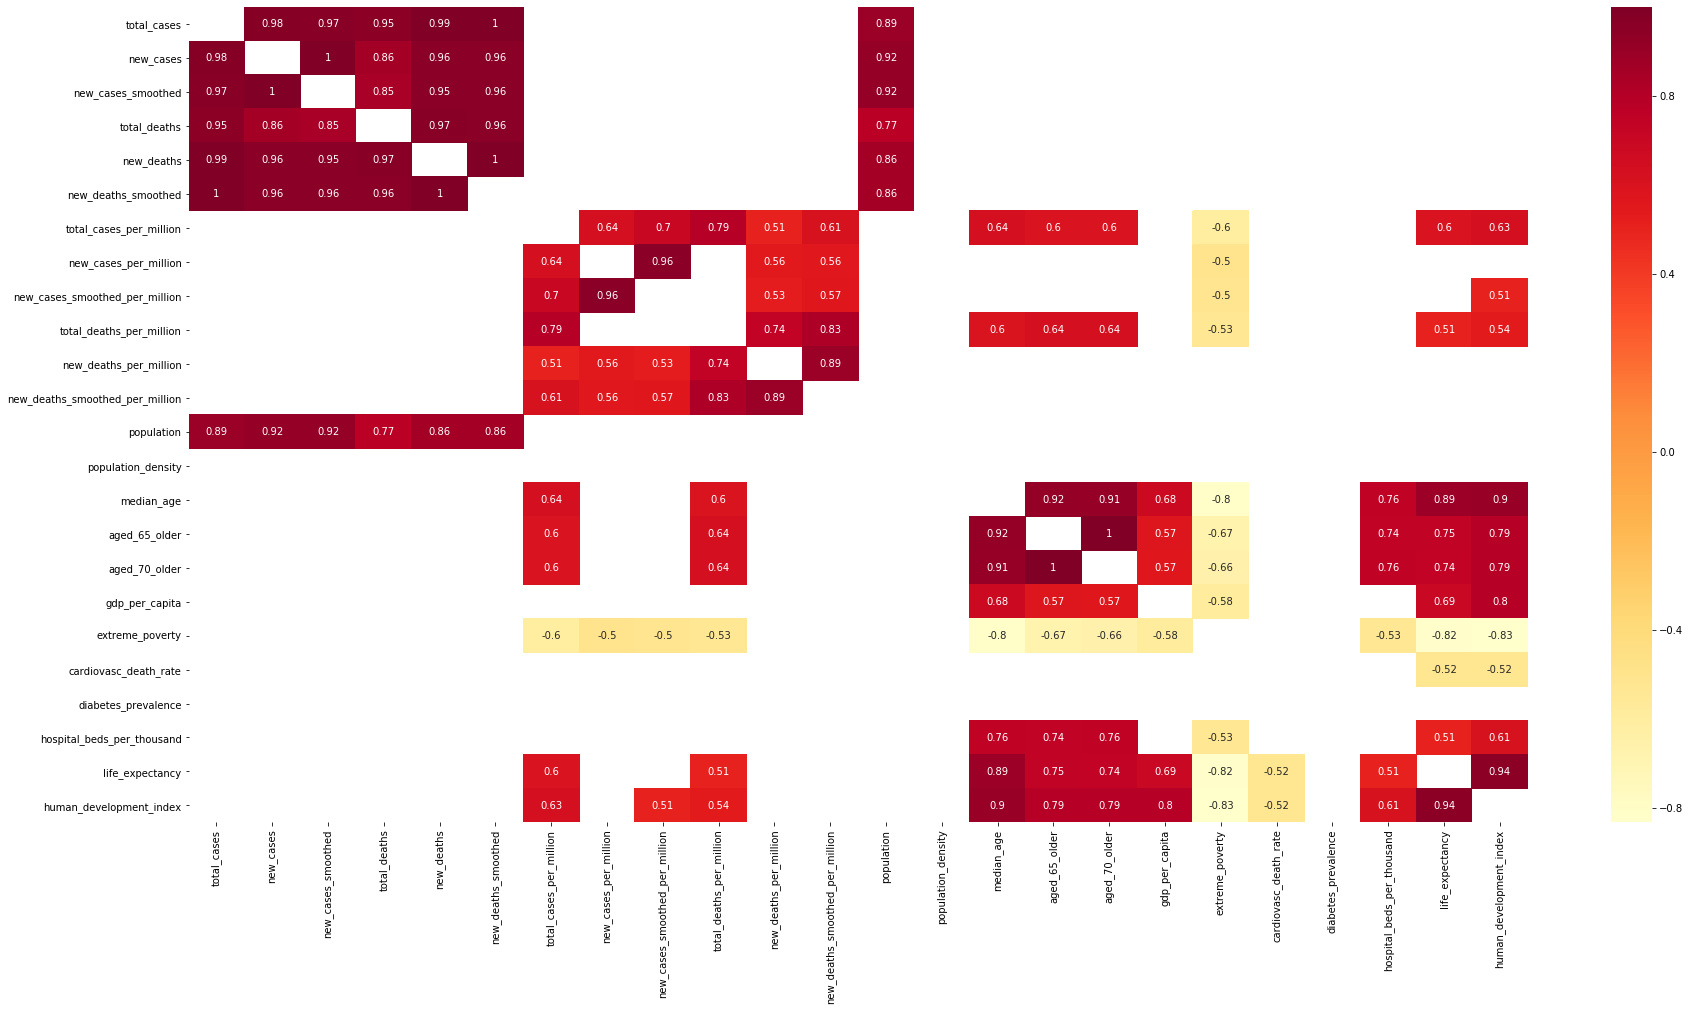

In [9]:
#set data set for analysis
filterValue = 0.5
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [10]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

human_development_index  extreme_poverty       -0.831938
life_expectancy          extreme_poverty       -0.819050
extreme_poverty          median_age            -0.803790
aged_65_older            extreme_poverty       -0.673439
aged_70_older            extreme_poverty       -0.659213
                                                  ...   
total_cases              new_deaths_smoothed    0.995581
aged_70_older            aged_65_older          0.995954
new_deaths               new_deaths_smoothed    0.999452
new_cases                new_cases_smoothed     0.999735
total_cases              total_cases                 NaN
Length: 79, dtype: float64

In [11]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,48.000000,48.000000,48.000000,47.000000,30.000000,49.000000,49.000000,43.000000,49.000000,49.000000
mean,1.542003e+06,13665.862745,12498.285647,28433.294118,196.784314,181.683451,33270.952588,155.874451,127.851020,610.343216,...,30.422917,8.688937,5.496875,16507.046362,15.106667,254.403939,7.667755,3.026837,72.499796,0.716714
std,6.257163e+06,73864.869797,69840.424045,96593.328246,855.970568,794.368431,40017.751497,196.148731,169.699524,781.320958,...,9.316680,6.030146,4.036714,16243.949408,21.943657,120.047840,3.412306,2.309600,8.139820,0.157932
min,2.280000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,71.274000,0.000000,0.000000,0.505000,...,16.700000,2.372000,1.337000,661.240000,0.200000,105.599000,0.990000,0.400000,53.280000,0.397000
25%,1.301750e+04,23.500000,30.571000,166.000000,0.000000,0.571500,1566.455000,4.807000,5.528500,31.163000,...,20.050000,3.362500,2.032750,3562.495000,0.700000,176.957000,5.810000,1.300000,64.830000,0.574000
50%,7.494600e+04,425.000000,281.714000,1152.000000,6.000000,4.000000,13672.222000,78.435000,45.238000,275.364000,...,32.150000,6.457500,4.091500,13254.949000,1.650000,237.372000,7.110000,2.200000,75.050000,0.765000
75%,3.530015e+05,1847.000000,1544.357000,9547.500000,32.500000,34.357000,58384.811000,300.612500,169.152000,981.334500,...,38.175000,13.746500,8.850500,22080.370000,23.475000,298.003000,9.590000,4.270000,78.570000,0.838000
max,4.249058e+07,525129.000000,497521.143000,551943.000000,5621.000000,5261.714000,172950.236000,803.370000,750.981000,2756.658000,...,44.700000,20.801000,13.748000,71809.251000,77.100000,597.029000,17.110000,11.000000,83.730000,0.944000


In [12]:
for col in df.columns:
    print(col)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cardiovasc_death_rate
diabetes_prevalence
hospital_beds_per_thousand
life_expectancy
human_development_index


In [13]:
filterForLabels(corr_fit_filtered, 'total_deaths_per_million')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
aged_65_older,0.640259
aged_70_older,0.635378
extreme_poverty,-0.534640
human_development_index,0.536301
life_expectancy,0.507353
median_age,0.596677
new_deaths_per_million,0.738538
new_deaths_smoothed_per_million,0.827348
total_cases_per_million,0.785160


In [14]:
filterForLabels(corr_fit_filtered, 'total_cases_per_million')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
aged_65_older,0.600179
aged_70_older,0.599940
extreme_poverty,-0.598829
human_development_index,0.627738
life_expectancy,0.603652
median_age,0.635220
new_cases_per_million,0.637619
new_cases_smoothed_per_million,0.699843
new_deaths_per_million,0.508267
new_deaths_smoothed_per_million,0.610182


In [15]:
filterForLabels(corr_fit_filtered, 'life_expectancy')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
aged_65_older,0.747684
aged_70_older,0.740602
cardiovasc_death_rate,-0.518700
extreme_poverty,-0.819050
gdp_per_capita,0.694062
hospital_beds_per_thousand,0.512635
human_development_index,0.944017
median_age,0.891880
total_cases_per_million,0.603652
total_deaths_per_million,0.507353


In [16]:
filterForLabels(corr_fit_filtered, 'gdp_per_capita')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
aged_65_older,0.572099
aged_70_older,0.565985
extreme_poverty,-0.584565
human_development_index,0.799107
life_expectancy,0.694062
median_age,0.679300
